# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Set-up

Import needed libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the data and explore its basic features

In [82]:
ad_df = pd.read_csv('advertising.csv')

In [83]:
ad_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [84]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [85]:
ad_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory data analysis

Explore the 'Age' distributionn in the data

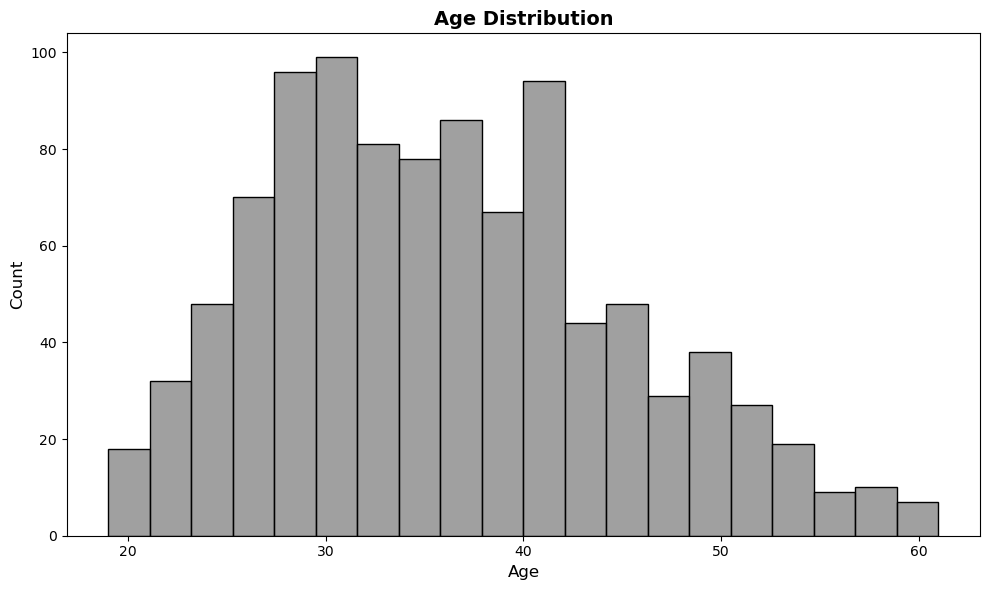

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(x = 'Age', data = ad_df, bins = 20, color = 'grey')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.title('Age Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

It seems that the primary age braket is just around 30, but with a spike at around 40-42.

Next, I will explore a joinplot to get a bit more information of how Age relates to Area Income and Daily time spent on site

<Figure size 1000x600 with 0 Axes>

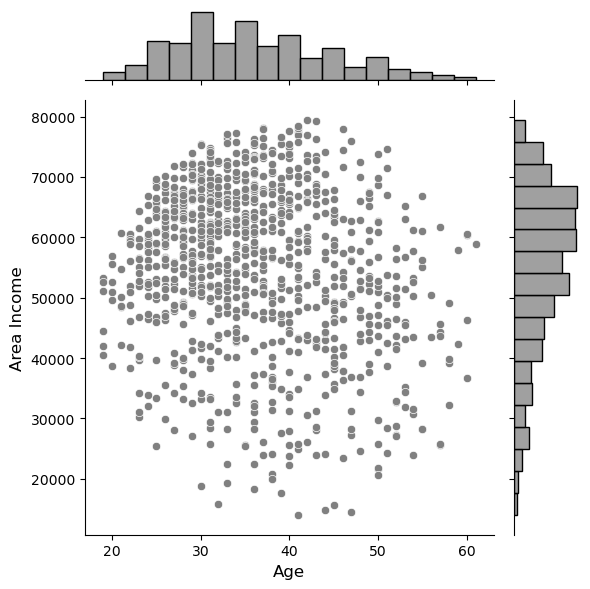

In [87]:
plt.figure(figsize=(10, 6))
sns.jointplot(x = 'Age', y = 'Area Income', data = ad_df, color = 'grey')
plt.ylabel('Area Income', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

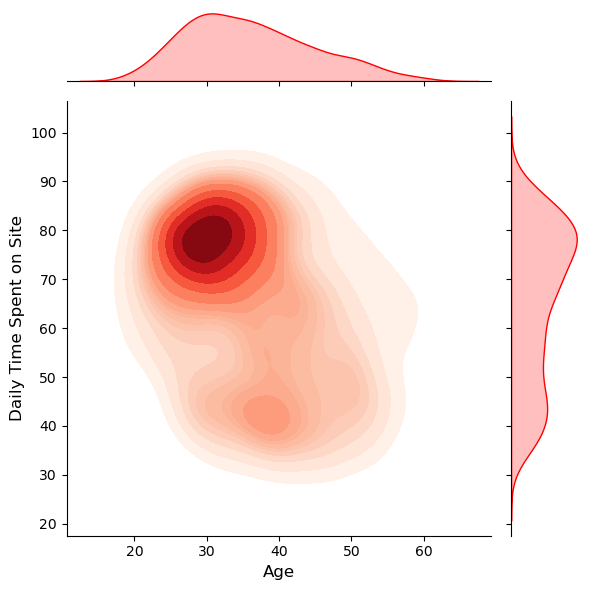

In [131]:
plt.figure(figsize=(10, 6))
sns.jointplot(x = 'Age', y = 'Daily Time Spent on Site', 
              data = ad_df, 
              cmap = 'Reds', 
              kind = 'kde', 
              fill = True,
              thresh=0.05,
             levels = 15,
             space = 0,
             marginal_kws={"fill": True, 'color' : 'red'})
plt.ylabel('Daily Time Spent on Site', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.tight_layout()
plt.show()

Then, let's explore 'Daily Time Spent on Site' vs. 'Daily Internet Usage'

<Figure size 1000x600 with 0 Axes>

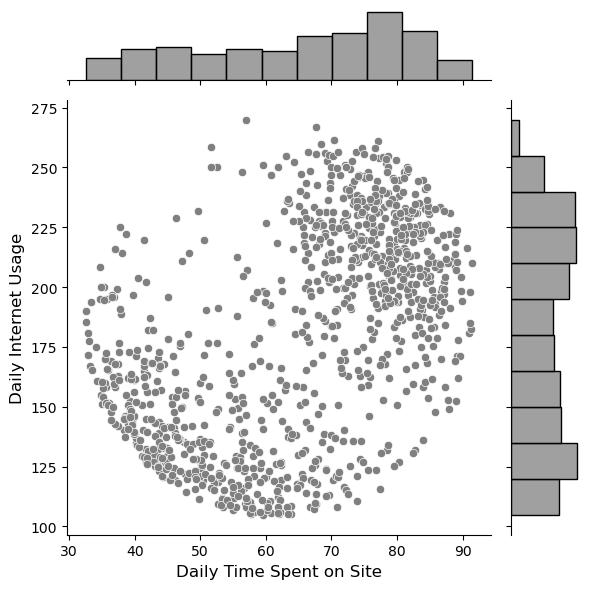

In [89]:
plt.figure(figsize=(10, 6))
sns.jointplot(x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', data = ad_df, color = 'grey')
plt.ylabel('Daily Internet Usage', fontsize=12)
plt.xlabel('Daily Time Spent on Site', fontsize=12)
plt.tight_layout()
plt.show()

Finally, lets check all relationships with the response variable we will be using later, 'Clicked on Ad', as the discriminatory color for the relationships.

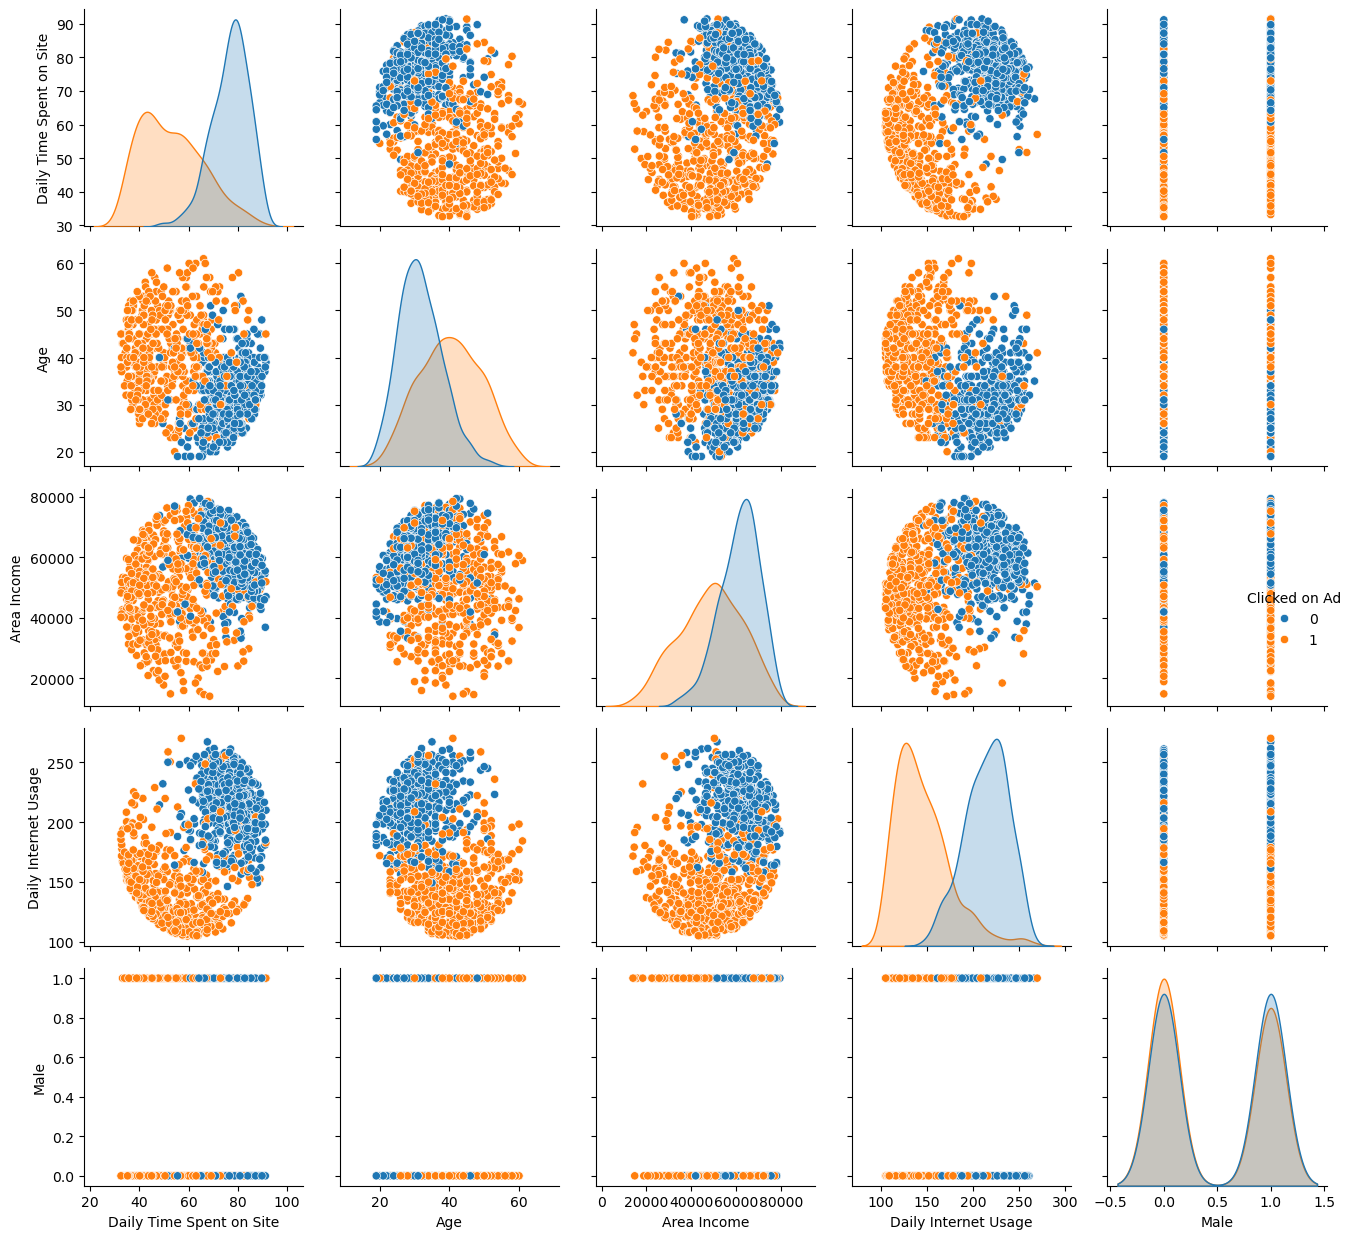

In [132]:
sns.pairplot(ad_df, hue = 'Clicked on Ad')
plt.tight_layout()
plt.show()

We can start to see some clear discrimination with some obvious clustering across all plots.

## Logistic Regression

Let's first create a train and test split in the data for model fit and evaluation

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
ad_df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [136]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Fit the model

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
logmodel = LogisticRegression()

In [140]:
logmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

We got some warning indicating that the logistic regression model didn’t converge — it hit the iteration limit (max_iter=100 by default in scikit-learn) before finding stable parameter estimates. This is common when your features are on different scales or when the optimization needs more iterations.

We can also check for potential **multicollinearity** issues, given that the model was giving us some trouble before. We want to make sure this is not a major issue for the model.

<Axes: >

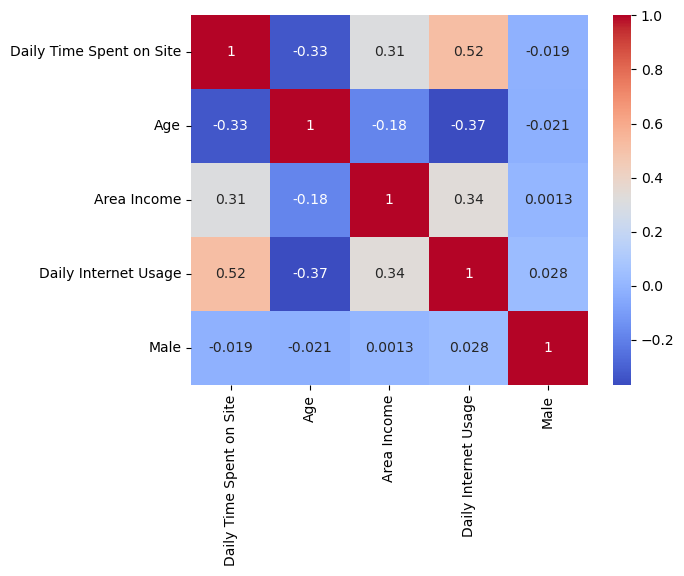

In [141]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')

The correlation among predictors seems relatively small, with values below +- 0.7. Multicollinearity issues might not be a problem

The approach I will take here is to **standardise** the features, as often scaling helps the optimizer converge faster and produces better coefficients.

In [142]:
from sklearn.preprocessing import StandardScaler

In [143]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [144]:
logmodel = LogisticRegression(max_iter=1000, solver='lbfgs')  # increased iterations
logmodel.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

Now the model seems to have been run without complications

### Model exploration

Before moving to predictions and evaluation metrics, I will interrogate the model we just fit, primarely because it gave us some problems when we tried to run the model with the unscale variables.

Let's first check the coefficients and ensure that the direction of influence makes sense intuitively and evaluate them against the initial expectations and assumptions.

In [102]:
pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': np.exp(logmodel.coef_[0])
}).sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
1,Age,3.342946
4,Male,0.728400
2,Area Income,0.204877
0,Daily Time Spent on Site,0.083927
3,Daily Internet Usage,0.075304


Note that we are transforming the coefficients to **odds ratios** make them interpretable. Therefore, now we can interpret the coefficients relative to 1, so values below 1 decrease odds (negative effect) and values above 1 increases the odds (positive effect).

Text(0.5, 1.0, 'Odds Ratios (log scale)')

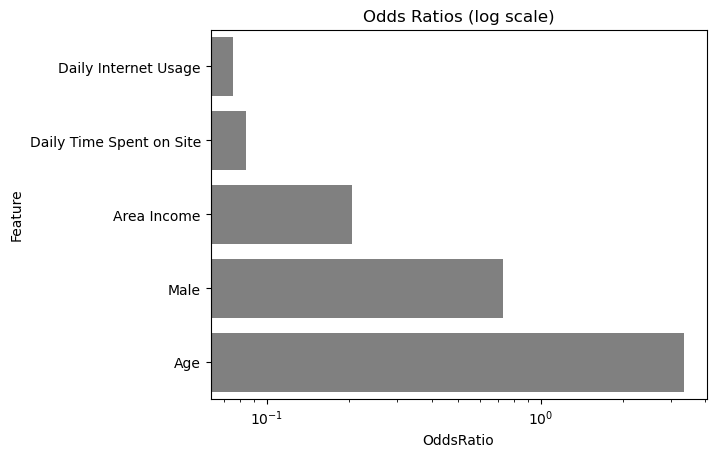

In [103]:
coef_df = pd.DataFrame({'Feature': X.columns, 
                        'OddsRatio': np.exp(logmodel.coef_[0])})
sns.barplot(x='OddsRatio', y='Feature', data=coef_df.sort_values('OddsRatio'), color = 'grey')
plt.xscale('log')
plt.title('Odds Ratios (log scale)')

How can we then interpret the model coefficients?

The logistic regression model reveals clear patterns in how user characteristics influence the likelihood of clicking an online advertisement. Among all predictors, Age shows the strongest positive association with ad clicks, with an odds ratio of approximately 3.34, indicating that older users are more than three times as likely to click on an ad compared to younger users, holding other factors constant. In contrast, Daily Internet Usage and Daily Time Spent on Site exhibit very strong negative effects, with odds ratios of 0.08 and 0.075, respectively. This suggests that users who spend more time online or on the website are substantially less likely—by over 90%—to click on ads, perhaps due to ad fatigue or habituation. Area Income also has a negative relationship (odds ratio ≈ 0.20), implying that individuals from higher-income areas are less inclined to engage with advertisements. Finally, Gender (Male) has a modest negative effect (odds ratio ≈ 0.73), indicating that men are slightly less likely to click ads than women. Overall, the model suggests that ad engagement tends to be higher among older, lower-income, and lighter internet users.

### Model diagnostics

Inspect predicted probabilities

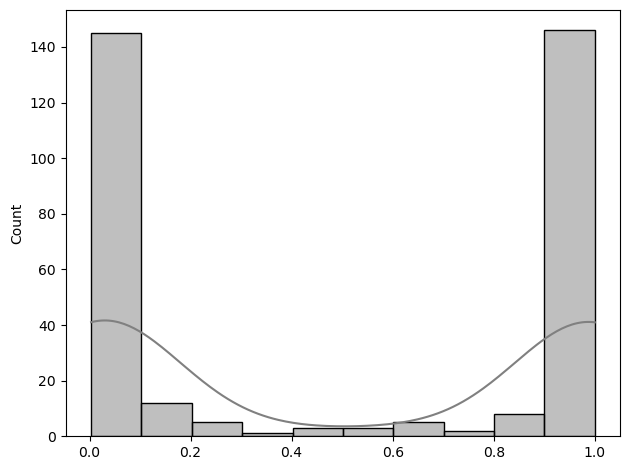

In [112]:
y_pred_proba = logmodel.predict_proba(X_test_scaled)[:,1]
sns.histplot(y_pred_proba, kde=True, color = 'grey')
plt.tight_layout()

It seem that we have a good spread without clustering around 0.5. The model is very confident in most of its predictions. This is usually a sign of a well-separated dataset, where the features are quite effective at distinguishing between people who clicked and didn’t click.

Separation plot

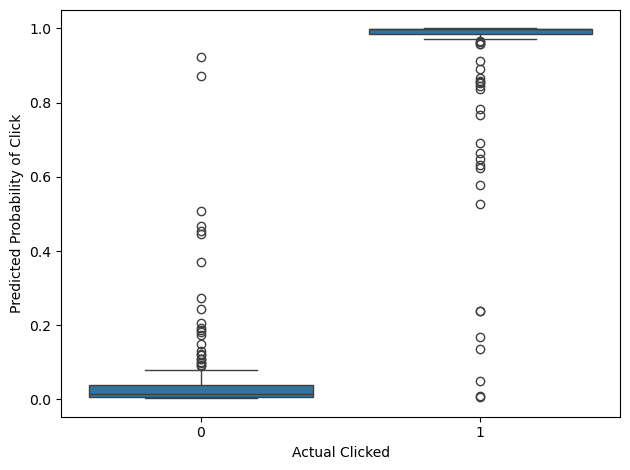

In [113]:
sns.boxplot(x=y_test, y=y_pred_proba)
plt.xlabel('Actual Clicked')
plt.ylabel('Predicted Probability of Click')
plt.tight_layout()

That’s excellent separation.
The model’s predicted probabilities align very strongly with true outcomes — it gives low scores to non-clickers and high scores to clickers.
This means that the model is well-calibrated and discriminative and it likely has high accuracy and ROC-AUC.

#### Predictions and further evaluations

Let's explore more in dept some of these diagnostics

In [114]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

# Predicted classes
y_pred = logmodel.predict(X_test_scaled)

In [115]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[159   3]
 [  7 161]]


- Top-left (159) → correctly predicted non-clicks (True Negatives)
- Bottom-right (161) → correctly predicted clicks (True Positives)
- 3 + 7 = 10 total errors out of 330 predictions — only about 3% misclassified.

This means your model is accurately distinguishing between users who clicked and didn’t click on ads.

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       162
           1       0.98      0.96      0.97       168

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



All metrics hover around 0.97, meaning the model has both high precision (few false positives) and high recall (few false negatives).
This is the hallmark of a well-calibrated, powerful classifier.

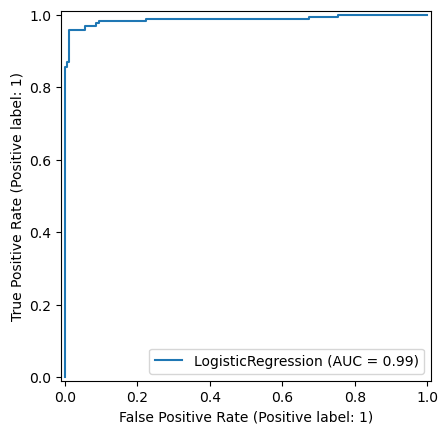

ROC-AUC: 0.9872868900646679


In [117]:
# ROC curve
RocCurveDisplay.from_estimator(logmodel, X_test_scaled, y_test)
plt.show()
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

The model ranks nearly all actual clicks above non-clicks in predicted probability.
In practical terms, it means this model can almost perfectly distinguish users likely to click vs not click.

#### Uncertainty in the inference
Although this was not part of the project, I find extremely important to interrogate the model further, specially when it comes to uncertainty around the coefficients. I understand that for ML the most important goal is predictions, but understanding the actual impact of each parameter requires accounting for uncertainty.

In [126]:
import statsmodels.api as sm

# Add a constant (intercept) to match the model form used in stats inference
X_scaled = scaler.fit_transform(X)
X_scaled_const = sm.add_constant(X_scaled)

# Fit the logistic regression model
logit_scaled = sm.Logit(y, X_scaled_const)
result_scaled = logit_scaled.fit()
print(result_scaled.summary())

Optimization terminated successfully.
         Current function value: 0.090904
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            5
Date:                Mon, 03 Nov 2025   Pseudo R-squ.:                  0.8689
Time:                        16:26:46   Log-Likelihood:                -90.904
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                3.136e-258
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8673      0.325      5.746      0.000       1.230       2.504
x1            -3.0539      0

In [145]:
# Exponentiate to get odds ratios with CI
params = result.params
conf = result.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
np.exp(conf)

,2.5%,97.5%,Odds Ratio
const,3.422354,12.234682,6.470813
x1,0.024763,0.089874,0.047175
x2,2.873275,6.998343,4.484213
x3,0.098461,0.264234,0.161297
x4,0.034434,0.110222,0.061607
x5,0.545174,1.203552,0.810028
